<a href="https://colab.research.google.com/github/chetankhairnar05/Colab/blob/main/DLProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)
print(tf.test.is_built_with_cuda())
print(tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2.18.0
True
True


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
dst = pd.read_csv('/content/Churn_Modelling.csv')
dst.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
x = dst.iloc[:,3:13]

print(x.head())


   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  
RowNumber            14
CustomerId     15691483
Surname            Chin
CreditScore         549
Geography        France
Name: 13, dtype: object


In [9]:
a = pd.get_dummies(x['Geography'])
b = pd.get_dummies(x['Gender'])
a.head()


,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True


In [10]:
b.head()

,Female,Male
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [18]:
y = dst.iloc[:,13]

In [19]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [20]:
a1 = pd.get_dummies(x['Geography'],drop_first=True)
b1 = pd.get_dummies(x['Gender'],drop_first=True)
a1.head()

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


In [21]:
b1.head()

,Male
0,False
1,False
2,False
3,False
4,False


In [22]:
x = x.drop(['Geography','Gender'],axis=1)

In [23]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [24]:
x1 = pd.concat([x,a1,b1],axis=1)
x1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size = 0.25, random_state = 1)


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [28]:
classifier = Sequential()
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))

In [29]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=20)

Epoch 1/20
503/503 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7863 - loss: 0.5373 - val_accuracy: 0.8013 - val_loss: 0.4478
Epoch 2/20
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8018 - loss: 0.4416 - val_accuracy: 0.8126 - val_loss: 0.4214
Epoch 3/20
503/503 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8215 - loss: 0.4192 - val_accuracy: 0.8364 - val_loss: 0.4002
Epoch 4/20
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8498 - loss: 0.3799 - val_accuracy: 0.8409 - val_loss: 0.3755
Epoch 5/20
503/503 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8501 - loss: 0.3698 - val_accuracy: 0.8502 - val_loss: 0.3624
Epoch 6/20
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8613 - loss: 0.3527 - val_accuracy: 0.8526 - val_loss: 0.3573
Epoch 7/20
503/503 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8543 - loss: 0.3552 - val_accuracy: 0.8534 - val_loss: 0.3546
Epoch 8/20
503/503 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8562 - loss: 0.3543 - val_accuracy: 0.

In [31]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

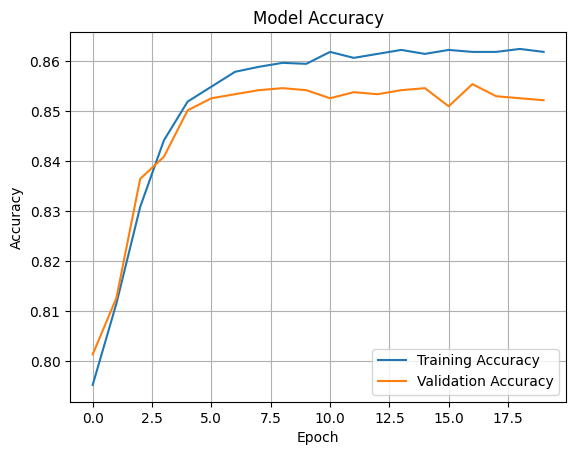

In [32]:
# Accuracy plot
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


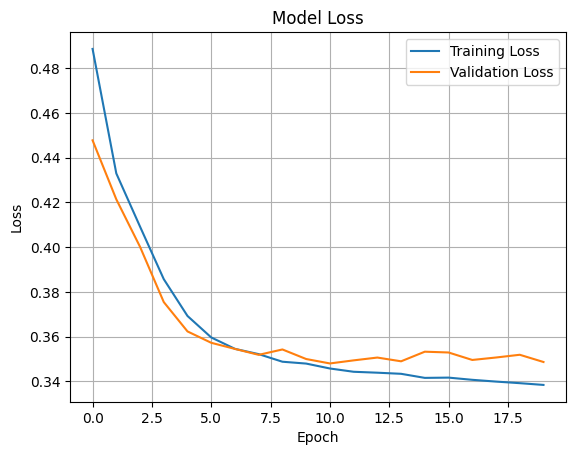

In [33]:
# Loss plot
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
y_pred = classifier.predict(X_test)


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [36]:
print(y_pred)

[[0.01353106]
 [0.11027099]
 [0.08961467]
 ...
 [0.2998078 ]
 [0.47143272]
 [0.16483267]]


In [37]:
y_pred_new = (y_pred > 0.5)
print(y_pred_new)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred_new)
cm

array([[1925,   55],
       [ 283,  237]])

In [39]:
score = accuracy_score(y_test,y_pred_new)
score


0.8648

In [40]:
classifier.get_weights()

[array([[-0.11321185,  0.16332877,  0.156283  , -0.11255683,  0.05681586,
         -0.12669891, -0.18492448,  0.05290448,  0.1210163 , -0.06292973,
          0.03756246],
        [-0.33684573,  0.04784535, -0.1203512 , -0.52093536,  0.4819274 ,
          0.3847398 ,  0.5790264 , -0.24031222, -0.522228  ,  0.33152688,
         -0.65792453],
        [ 0.21669748, -0.279908  ,  0.24306624, -0.31002244, -0.00680114,
          0.00240286,  0.20107555,  0.26548573, -0.02971294, -0.13859668,
         -0.23841669],
        [ 0.1458437 , -0.33594117, -0.06555872,  0.32995102, -0.69994676,
          0.22203392, -0.16635479,  0.26898834, -0.4185607 , -0.02917391,
         -0.4277299 ],
        [ 0.45741287,  0.45300478,  0.04617127, -0.08280218, -0.48513377,
         -0.12669103,  0.07821196,  0.89232653,  0.11189899,  1.0120578 ,
          0.3733011 ],
        [-0.1892091 , -0.03365305,  0.01647881,  0.22348562, -0.06379717,
          0.53276974,  0.16427629,  0.26674992,  0.00982031, -0.0228543

In [43]:
#new consepts classifier.add dropout and early stopping
classifier.save("DLProject2.keras")

In [47]:
classifier.save_weights("DLProject2W.weights.h5")